### Load iris data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt

iris = pd.read_csv('data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
list(iris)

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']

### Define frames for the three classes

In [3]:
setosa = iris[iris.Species=='Iris-setosa']
versicolor = iris[iris.Species=='Iris-versicolor']
virginica = iris[iris.Species=='Iris-virginica']

In [4]:
print("setosa: {} flowers; versicolor: {} flowers; virginica: {} flowers.".format(setosa.shape, versicolor.shape, virginica.shape))

setosa: (50, 5) flowers; versicolor: (50, 5) flowers; virginica: (50, 5) flowers.


### Plot scatter plot with colors according to labels

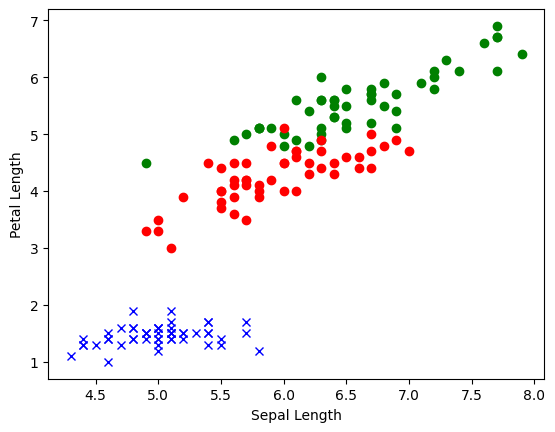

In [7]:
s = plt.plot(setosa['SepalLength'],setosa['PetalLength'],'bx')
vi = plt.plot(virginica['SepalLength'],virginica['PetalLength'],'go')
ve = plt.plot(versicolor['SepalLength'],versicolor['PetalLength'],'ro')
lx = ve[0].axes.set_xlabel('Sepal Length')
ly = ve[0].axes.set_ylabel('Petal Length')

In [ ]:
s = plt.plot(setosa['SepalWidth'],setosa['PetalWidth'],'bo')
vi = plt.plot(virginica['SepalWidth'],virginica['PetalWidth'],'go')
ve = plt.plot(versicolor['SepalWidth'],versicolor['PetalWidth'],'ro')
lx = ve[0].axes.set_xlabel('Sepal Width')
ly = ve[0].axes.set_ylabel('Petal Width')

### Split data into train and test set

In [8]:
from sklearn.model_selection import train_test_split
attributes = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = iris[attributes]
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Learn something...

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

### Train the classifier with the training data

In [ ]:
knn.fit(X_train, y_train)

### Predict using kNN 

In [ ]:
df = pd.DataFrame(data=X_test, columns=attributes)
df['true class'] = y_test
df['kNN_pred'] = knn.predict(X_test)
df

### Estimate the accuracy of the classifier on future data, using the test data

In [ ]:
knn.score(X_test, y_test)

### What happens if we vary k?

In [ ]:
k_range = [num for num in range(110) if num % 10 == 1]
print(k_range)

In [ ]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    print("with {}-NN accuracy is {}".format(k, knn.score(X_test, y_test)))